<a href="https://colab.research.google.com/github/WereszczynskiClasses/Phys240_Solutions/blob/main/Activity-Euler-Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ordinary Differential Equations

One of the most common applications of programming to physics is to solve differential equations.  In the next few classes, we're going to look at ways to solve these equations.  This can be particularly useful for understanding how systems evolve in time, as many differential equations we encounter in physics have a time dependence.  First, let's start with a review of some terminology:

## Differential Equations

An equation of this form:

$\frac{dx}{dt} + a\left(t\right)x = b\left(t\right)$

is considered a 1st-order linear inhomogeneous ordinary differential equation.  There's a lot to unpack there, but basically:

*   The order refers to the highest derivative.  Here, the highest derivative is $\frac{dx}{dt}$, so it's first order.  If there was a term such as $\frac{d^2 x}{dt^2}$ it would be a 2nd-order equation.
*   Linear means that all the terms that have $x$ or its derivatives are linear in $x$.  If you had terms such as $x^2$ or $\frac{1}{x}$ in your equation, it would be nonlinear. 
*  Inhomogeneous means that there is a term in the equation without $x$ or its derivatives.  If the term $b\left(t\right)$ wasn't in the equation above, this would be a homogeneous equation.

Even if you haven't taken a differential equations class, you've dealt with differential equations for most of your physics career.  For example, consider the 2nd-order equation for a simple harmonic oscillator:

$m \frac{d^2 x}{dt^2} = - kx$

In physics 1 you solved this and found a solution that looked like:


$x\left(t\right) = A \sin\left( \omega t + \phi \right)$  

where:

$\omega = \sqrt{\frac{k}{m}}$

Although this is the correct answer, it is not complete.  You need to know something about the initial conditions (or the system at some time later) to compute the amplitutde $A$ and the phase $\phi$.  This highlights an important point about  differential equations: to completely solve them we need additional data about our system, either what's happening at time $t=0$ (an initial condition) or whats happening at some later time $t=t_0$ (a boundary condition).

Note that not all differential equations involve time, but many of the ones you'll encounter and that we deal with do.  The techniques can be easily adapted to differential equations without a time dependence. 


## Euler's Method

In the above example we were able to come up with an analytic solution to our differential equation.  However, in many cases this will be impossible to do.  For example, one could add a time and position-dependent driving force to the system to create a differential equation that looks like this:

$m \frac{d^2 x}{dt^2} = - kx + C \cos \left(D x \right) \sin\left( \Omega t\right)$

There's no way you can solve this analytically.  BUT, you can solve it numerically, and you're likely to get a more interesting looking result then the simple harmonic oscillator.  

We're going to start with solving first-order differential equations (higher order methods aren't that much more difficult).  There have been several algorithms developed for solving first-order ODEs, and perhaps the simplest is Euler's method.  

Let's say we have a first-order ODE that we can write in the form:

$\frac{dx}{dt} = f\left(x,t\right)$

Lets also assume that we know where our system is at some time, that is, we know $x\left(t\right)$ for a given $t$.  If we want to know where the system is some small time later we can use a Taylor expansion to write:

$x\left(t+h\right) = x\left(t\right) + h \frac{dx}{dt}+\frac{1}{2}h^2\frac{d^2x}{dt^2}+.... $

Here, we've introduced the variable $h$ for the small time interval that we are going to use in our Taylor expansion.  We call $h$ a "timestep" as its the amount in time forward that we are moving our system. If the timestep is small, we can rewrite the above expression to give:

$x\left(t+h\right) \approx x\left(t\right) + h f\left(x,t\right)$

Where we have truncated terms that are on the order of $h^2$ or larger (keep this in mind when we talk about errors).

This creates a simple and intuitive algorithm for solving our ODE which is defined for a function $f\left(x,t\right)$ and an initial position $x\left(h\right)$.  We perform a large number of steps, $N$, and for a particular step (which we denote by $n$) we do the following:

1.  For that position and time, $x_n$ and $t_n$, calculate the value of the function $f\left(x_n,t_n\right)$.

2.  Update our time to be $t_{n+1} = h \cdot (n+1)$.

3.  Update our position to be $x_{n+1} = x_n + h f\left(x_n,t_n\right)$.

We repeat those three steps for however long we want, using the positions and times from iteration $n$ to calculate the next positions and times for iteration $n+1$.

**Activity:**  Implement Euler's method to solve the following differential equation:

$\frac{dx}{dt} = -x^3 + \sin t$

with an initial condition of $x=1.0$ at $t=0$.  Solve this for the time $t=0$ to $t = 10$.  Initially, use a timestep of $h$ = 0.1.  Once your code works, try several different values of $h$ (such as $h=0.01, 0.05, 0.1, 0.5, 1.0$.  Plot the results curves for $x\left(t\right)$ for each of these timesteps.  How do your results change when you change the timestep?  What is a "good" value to use?

A few hints:

* You'll want to define arrays for your x-points and t-points
* At iteration $n$, make sure to update both your x and t values for iteration $n+1$, but make sure you are using the values at iteration $n$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Set your user defined variables for the initial conditions as well as the start and end time and the timestep (which I'm going to do in an array here to test all of these values).

In [ ]:
start =  0.0
end   = 10.0
x_0   =  1.0
t_0   =  0.0
dt    = np.array([.01, .05, 0.1, 0.5, 1.0])

Define our function f(x,t)

In [ ]:
def f(x,t):
  return -x**3+np.sin(t)

Here I'm going to do this in a loop over the timesteps so that I can compare the results.

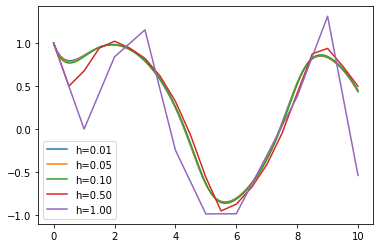

In [ ]:
for h in dt:
  N = int((end-start)/h) +1 #determine how many points I need/. I'm adding 1 to make sure I get both the start and end times
  xpoints = np.zeros(N) #define an array for my x values.  Initially set everything to 0.
  tpoints = np.zeros(N) #define an array for my time values.  Initially set everything to 0.
  xpoints[0] = x_0 #set our initial condition 
  tpoints[0] = t_0 #set our initial condition (not strictly necessary in this case since t at 0 is 0, but still good to do)
  for n in range(N-1):
    tpoints[n+1] = h * (n+1)
    xpoints[n+1] = xpoints[n] + h*f(xpoints[n],tpoints[n])
  plt.plot(tpoints,xpoints,label='h=%0.2f'%h)
plt.legend()
plt.show()


# Activity

This activity is on your next homework assignment, so if you get through the previous activity you can start on this:

Here is a simple electronic circuit with one resistor and one capacitor:

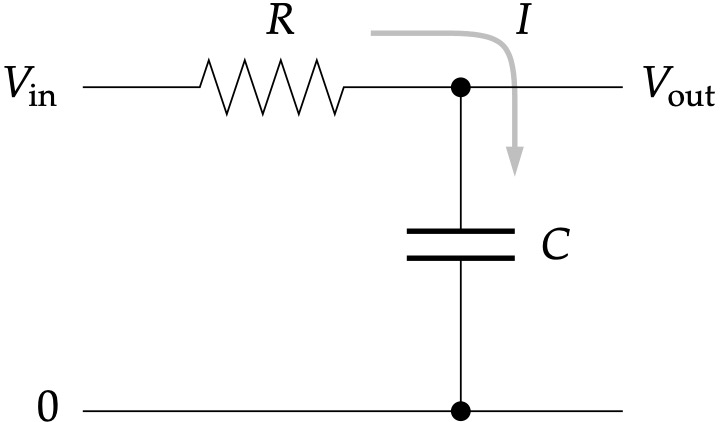


This circuit acts as a low-pass filter: you send a signal in on the left
and it comes out filtered on the right.

Using Ohm's law and the capacitor law and assuming that the output load has
very high impedance, so that a negligible amount of current flows through
it, we can write down the equations governing this circuit as follows.  Let
$I$ be the current that flows through $R$ and into the capacitor, and let
$Q$ be the charge on the capacitor.  Then:

$IR = V_\textrm{in} - V_\textrm{out}\,,\qquad
 Q = CV_\textrm{out}\,,\qquad
 I = \frac{dQ}{dt}$

Substituting the second equation into the third, then substituting the
result into the first equation, we find that 

$ V_\textrm{in} -V_\textrm{out} = RC\left(d V_\textrm{out}/d t\right)$, or equivalently

$\frac{d V_\textrm{out}}{dt} = \frac{1}{RC}\left(V_\textrm{in} -V_\textrm{out}\right)$

##A.
Write a program (or modify a previous one) to solve this equation for
  $V_\textrm{out}(t)$ when
  the input signal is a square-wave with frequency 1 and amplitude 1 using:

$
V_\textrm{in}(t) = \begin{cases}
                     1  & \qquad\mbox{if $\lfloor 2t \rfloor$ is even,} \\
                     -1 & \qquad\mbox{if $\lfloor 2t \rfloor$ is odd,}
                   \end{cases}
$

where $\lfloor x\rfloor$ means $x$ rounded down to the next lowest integer.
Use the program to make plots of the output of the filter circuit from
$t=0$ to $t=10$ when $RC=0.01$, $0.1$, and~1, with initial
condition of $V_\textrm{out}(0)=0$.  You will have to make a decision about
what value of $h$ to use in your calculation.  Small values give more
accurate results, but the program will take longer to run.  Try a variety
of different values and choose one for your final calculations that seems
sensible to you.

##B.
Based on the graphs produced by your program, describe what you see
  and explain what the circuit is doing.


A program similar to the one you wrote is running inside most stereos and
music players, to create the effect of the "bass" control.  In the old
days, the bass control on a stereo would have been connected to a real
electronic low-pass filter in the amplifier circuitry, but these days there
is just a computer processor that simulates the behavior of the filter in a
manner similar to your program.
